In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

In [2]:
df = pd.read_csv("diagnosis-of-covid-19-and-its-clinical-spectrum.csv")
df

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
booldict = {
    "negative" : 0,
    "positive" : 1
}

df["sars_cov_2_exam_result"] = df["sars_cov_2_exam_result"].map(booldict)
df

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,f,f,f,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,1,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.select_dtypes(exclude=['object'])
df = df.drop("patient_age_quantile", axis=1)
df

,sars_cov_2_exam_result,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def cleanse():
    for i in np.arange(0.1, 1, 0.01):
        df_copy = df
        df_copy = df_copy.loc[:, df.isnull().sum() < i*df.shape[0]]
        df_copy = df_copy.dropna()
        print("Threshold: ", i, "Shape: ", df_copy.shape)

cleanse()

Threshold:  0.1 Shape:  (5644, 1)
Threshold:  0.11 Shape:  (5644, 1)
Threshold:  0.12 Shape:  (5644, 1)
Threshold:  0.13 Shape:  (5644, 1)
Threshold:  0.13999999999999999 Shape:  (5644, 1)
Threshold:  0.14999999999999997 Shape:  (5644, 1)
Threshold:  0.15999999999999998 Shape:  (5644, 1)
Threshold:  0.16999999999999998 Shape:  (5644, 1)
Threshold:  0.17999999999999997 Shape:  (5644, 1)
Threshold:  0.18999999999999995 Shape:  (5644, 1)
Threshold:  0.19999999999999996 Shape:  (5644, 1)
Threshold:  0.20999999999999996 Shape:  (5644, 1)
Threshold:  0.21999999999999995 Shape:  (5644, 1)
Threshold:  0.22999999999999995 Shape:  (5644, 1)
Threshold:  0.23999999999999994 Shape:  (5644, 1)
Threshold:  0.24999999999999992 Shape:  (5644, 1)
Threshold:  0.2599999999999999 Shape:  (5644, 1)
Threshold:  0.2699999999999999 Shape:  (5644, 1)
Threshold:  0.2799999999999999 Shape:  (5644, 1)
Threshold:  0.2899999999999999 Shape:  (5644, 1)
Threshold:  0.29999999999999993 Shape:  (5644, 1)
Threshold:  0.3

In [6]:
df = df.loc[:, df.isnull().sum() < 0.9199999999999996*df.shape[0]]
df = df.dropna()
df

,sars_cov_2_exam_result,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,neutrophils,proteina_c_reativa_mg_dl
1,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.619086,-0.147895
8,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.286986
18,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.265957,-0.487674
28,0,1.014726,0.854844,-0.178244,0.796029,0.489872,-0.730707,-0.353319,-0.075131,2.525365,0.544077,0.217977,0.767079,0.068652,0.171035,0.651115,-0.434025
29,0,0.740064,0.854844,0.361914,-0.550290,0.436981,-0.227493,0.642463,0.105751,-0.529226,0.596348,-0.371974,0.386517,0.121178,-0.713529,0.347905,-0.529401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,1.118221,3.627427
5614,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,1.134611,5.733660
5615,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,-0.061837,0.561468
5618,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,1.552548,0.609157


# Remove NaN

In [7]:
print("Positive Sample Count: ",df[df["sars_cov_2_exam_result"]==1].shape[0])
print("Negative Sample Count: ",df[df["sars_cov_2_exam_result"]==0].shape[0])

Positive Sample Count:  59
Negative Sample Count:  361


# Features Selection

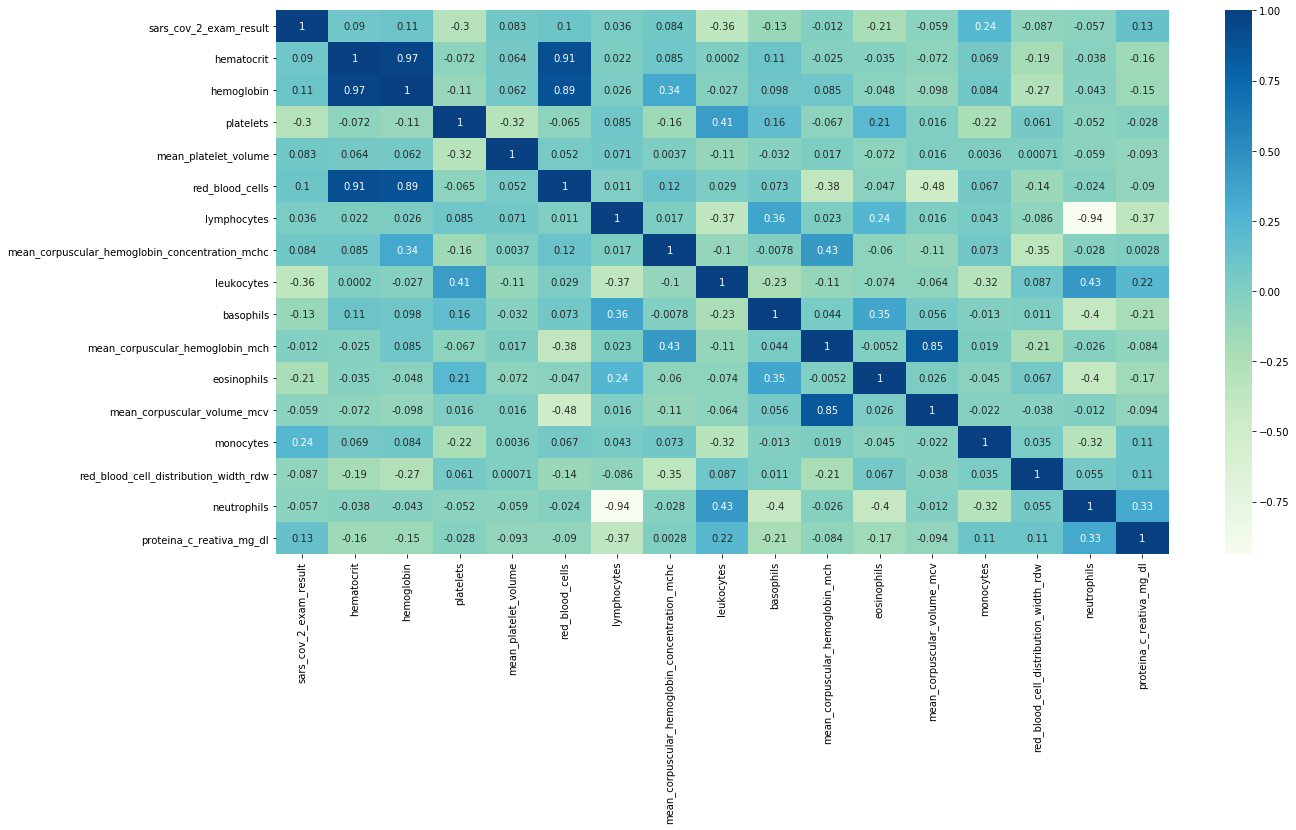

In [8]:
corr_mat = df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(data=corr_mat, annot=True, cmap="GnBu")
plt.show()

In [9]:
candidates = corr_mat.index.values

In [10]:
removed = []

for c1 in candidates:
    for c2 in candidates:
        if (c1 not in removed) and (c2 not in removed):
            if c1!=c2:
                if corr_mat.loc[c1,c2] > 0.6 or corr_mat.loc[c1,c2] < -0.6:
                    removed.append(c1)
print("Removed: ", removed)

Removed:  ['hematocrit', 'hemoglobin', 'lymphocytes', 'mean_corpuscular_hemoglobin_mch']


In [11]:
data = df.drop(removed, axis=1)
data

,sars_cov_2_exam_result,platelets,mean_platelet_volume,red_blood_cells,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,neutrophils,proteina_c_reativa_mg_dl
1,0,-0.517413,0.010677,0.102004,-0.950790,-0.094610,-0.223767,1.482158,0.166192,0.357547,-0.625073,-0.619086,-0.147895
8,0,1.429667,-1.672222,-0.850035,3.331071,0.364550,-0.223767,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.286986
18,0,0.072992,-0.550290,0.542763,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-0.220244,0.171035,0.265957,-0.487674
28,0,-0.178244,0.796029,0.489872,-0.353319,-0.075131,2.525365,0.217977,0.767079,0.068652,0.171035,0.651115,-0.434025
29,0,0.361914,-0.550290,0.436981,0.642463,0.105751,-0.529226,-0.371974,0.386517,0.121178,-0.713529,0.347905,-0.529401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,0,-0.102873,0.908221,0.384090,-0.054585,-0.328365,-0.834685,0.892207,-0.474754,1.066653,0.347948,1.118221,3.627427
5614,0,0.663397,-0.774677,0.754327,-1.050367,1.569499,0.081693,-0.540532,-1.976971,1.670707,0.967144,1.134611,5.733660
5615,0,-0.492289,-0.213711,0.613284,1.538664,-0.550988,-0.223767,-0.709090,0.005955,0.909074,-1.155812,-0.061837,0.561468
5618,0,-1.773594,-0.550290,-3.318285,1.538664,-1.733675,-1.140144,-0.582671,1.408024,1.381812,-0.448160,1.552548,0.609157


# PCA of Data for computation

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d

In [13]:
y = data.iloc[:, 0].values.astype("int")
x = data.iloc[:, 1:]

In [14]:
for i in range(1,10):
    pca = PCA(n_components=i)
    pc = pca.fit_transform(x)
    print("Explained Variance ratio sum of n_components " +str(i)+ ": ", pca.explained_variance_ratio_.sum())

Explained Variance ratio sum of n_components 1:  0.18751147800626675
Explained Variance ratio sum of n_components 2:  0.35104829850309605
Explained Variance ratio sum of n_components 3:  0.4786548921938646
Explained Variance ratio sum of n_components 4:  0.5854758985065059
Explained Variance ratio sum of n_components 5:  0.6817604539847858
Explained Variance ratio sum of n_components 6:  0.7513305700942221
Explained Variance ratio sum of n_components 7:  0.8101871191793104
Explained Variance ratio sum of n_components 8:  0.8626675153151293
Explained Variance ratio sum of n_components 9:  0.9067313771858302


In [15]:
#n_components = 8 is the optimal value
pca = PCA(n_components=8)
pc = pca.fit_transform(x)

In [16]:
columns = ["Class"]
for i in range(1,9):
    columns.append("PC"+str(i))
    
a = np.append(np.reshape(y, (-1,1)), pc, axis=1)

PCA_data = pd.DataFrame(a, columns = columns)
PCA_data

,Class,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.0,1.108064,0.230495,0.239158,0.307115,-0.134055,0.194245,-0.282053,-1.493653
1,0.0,0.492941,0.210027,-2.438205,-2.666281,1.139606,1.626717,0.655840,1.033698
2,0.0,-0.812625,0.224659,0.083754,0.104292,0.222804,-0.910387,-0.397893,-0.020054
3,0.0,0.593251,0.166147,0.259957,0.380827,-0.976943,-0.357808,-0.216468,0.476698
4,0.0,-0.547842,-0.172084,-0.649295,-0.891485,0.253947,-0.498507,0.139637,-0.115486
...,...,...,...,...,...,...,...,...,...
415,0.0,-1.258993,-0.311066,0.204224,1.178269,1.063325,2.567273,1.146835,-1.570694
416,0.0,-2.700731,0.871426,-1.179590,2.545280,3.318637,2.257960,1.854836,-1.330977
417,0.0,-0.367396,-1.830614,-0.571186,-1.059505,0.899325,0.119782,0.357931,-0.142506
418,0.0,-1.340245,-1.108054,3.216590,-2.732091,1.711285,1.493314,-0.751024,-0.056869


# Logistic Regression With PCA

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
x = PCA_data.iloc[:,1:]
y = PCA_data["Class"]
x_train, x_test, y_train, y_test = train_test_split(x , y, random_state = 42)

In [19]:
x2 = data.iloc[:,1:]
y2 = data["sars_cov_2_exam_result"]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2 , y2, random_state = 42)

In [20]:
logReg = LogisticRegression(solver="lbfgs", multi_class = 'auto', random_state = 42)

In [21]:
logReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = logReg.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8285714285714286

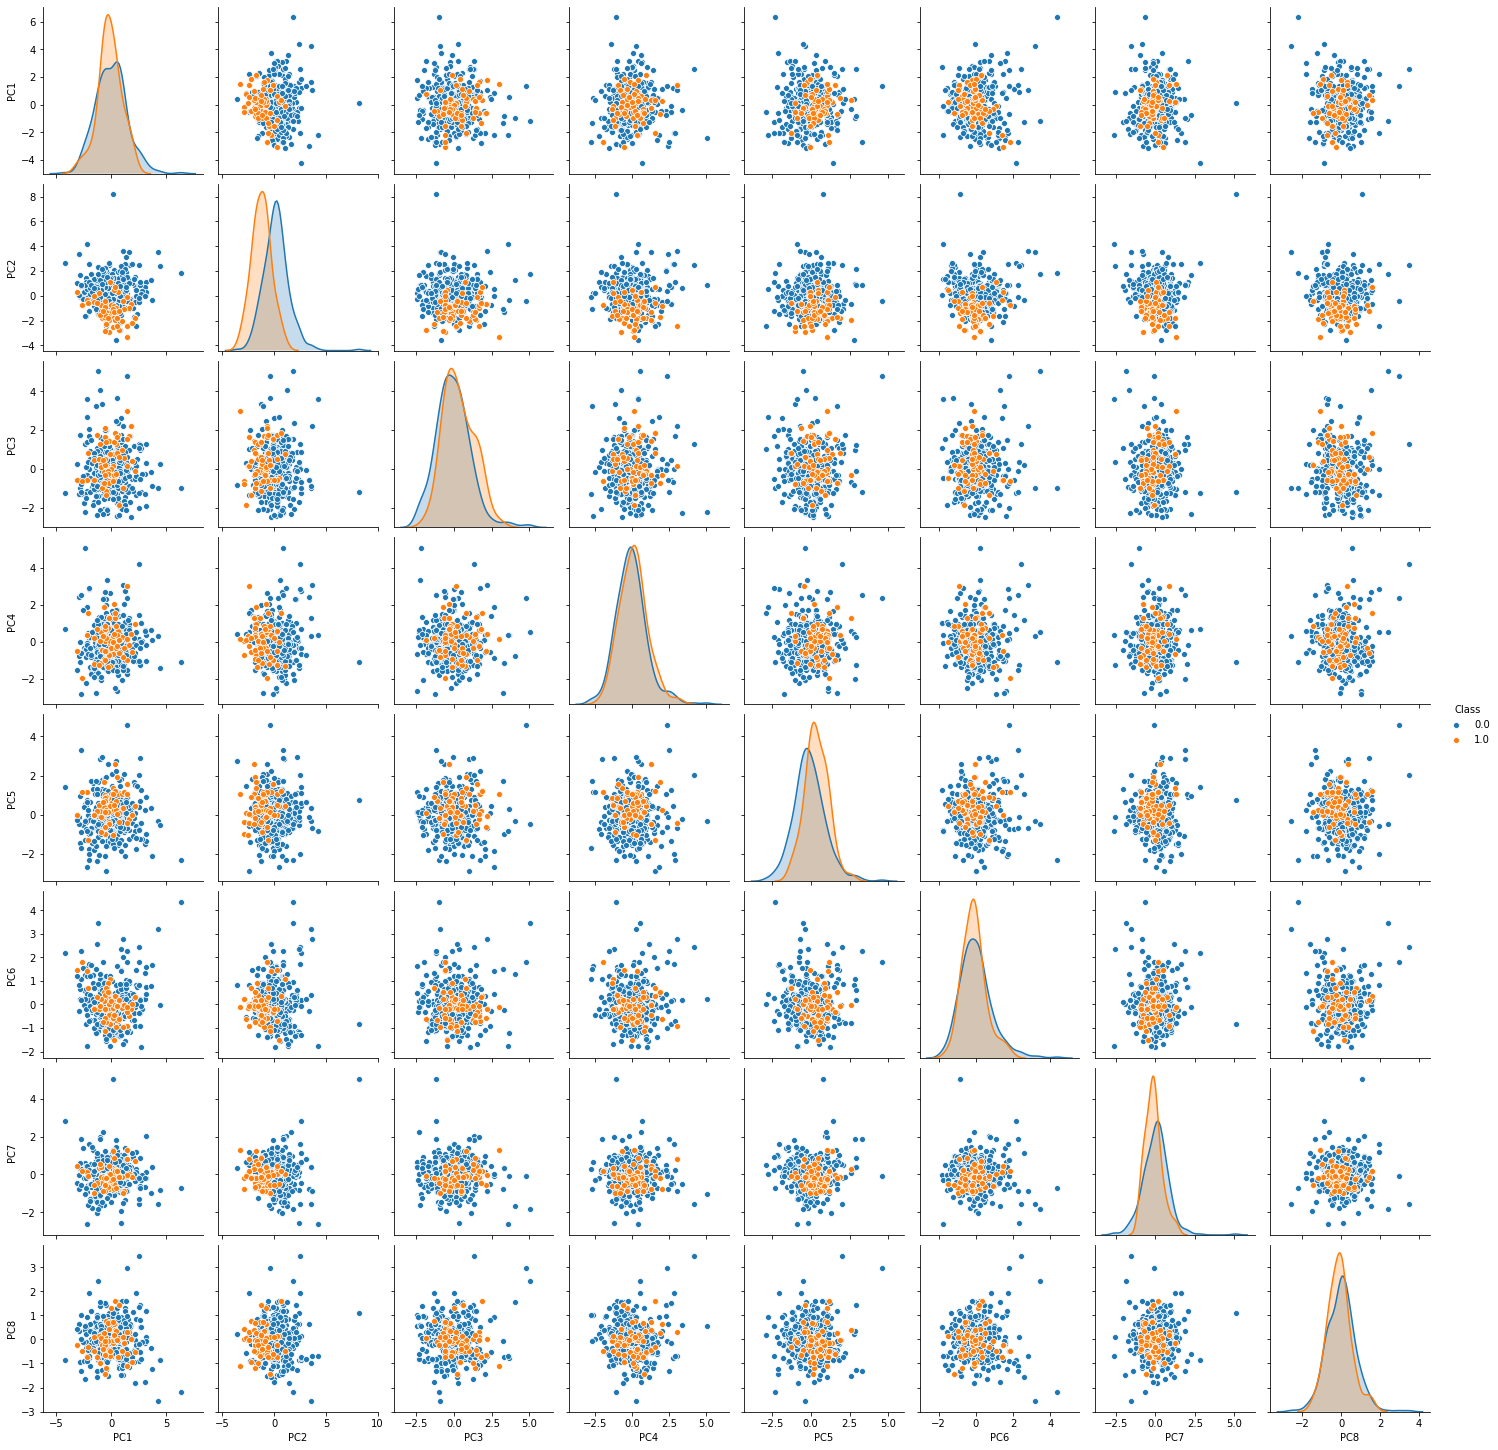

In [24]:
sb.pairplot (PCA_data, hue="Class")
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels =[1, 0])

array([[ 2, 17],
       [ 1, 85]], dtype=int64)

# Logistic Regression Without PCA

In [26]:
logReg2 = LogisticRegression(solver="lbfgs", multi_class = 'auto', random_state = 42)

In [27]:
logReg2.fit(x2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y2_pred = logReg2.predict(x2_test)

In [29]:
accuracy_score(y2_test, y2_pred)

0.8476190476190476

In [30]:
confusion_matrix (y2_test, y2_pred, labels =[1, 0])

array([[ 7, 12],
       [ 4, 82]], dtype=int64)

# KNN_Model With PCA

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
for i in range(1,311,2):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    print("K = "+str(i)+", Accuracy score = ",accuracy_score(y_test, y_pred))

K = 1, Accuracy score =  0.8476190476190476
K = 3, Accuracy score =  0.8666666666666667
K = 5, Accuracy score =  0.8285714285714286
K = 7, Accuracy score =  0.819047619047619
K = 9, Accuracy score =  0.8380952380952381
K = 11, Accuracy score =  0.819047619047619
K = 13, Accuracy score =  0.8095238095238095
K = 15, Accuracy score =  0.8
K = 17, Accuracy score =  0.8095238095238095
K = 19, Accuracy score =  0.8095238095238095
K = 21, Accuracy score =  0.8095238095238095
K = 23, Accuracy score =  0.8095238095238095
K = 25, Accuracy score =  0.8095238095238095
K = 27, Accuracy score =  0.819047619047619
K = 29, Accuracy score =  0.819047619047619
K = 31, Accuracy score =  0.819047619047619
K = 33, Accuracy score =  0.819047619047619
K = 35, Accuracy score =  0.819047619047619
K = 37, Accuracy score =  0.819047619047619
K = 39, Accuracy score =  0.819047619047619
K = 41, Accuracy score =  0.819047619047619
K = 43, Accuracy score =  0.819047619047619
K = 45, Accuracy score =  0.8190476190476

In [33]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8666666666666667

In [34]:
confusion_matrix (y_test, y_pred, labels =[1, 0])

array([[ 9, 10],
       [ 4, 82]], dtype=int64)

# KNN_Model Without PCA

In [35]:
for i in range(1,311,2):
    knn_model2 = KNeighborsClassifier(n_neighbors = i)
    knn_model2.fit(x2_train, y2_train)
    y2_pred = knn_model2.predict(x2_test)
    print("K = "+str(i)+", Accuracy score = ",accuracy_score(y2_test, y2_pred))

K = 1, Accuracy score =  0.8761904761904762
K = 3, Accuracy score =  0.8857142857142857
K = 5, Accuracy score =  0.8857142857142857
K = 7, Accuracy score =  0.8761904761904762
K = 9, Accuracy score =  0.8571428571428571
K = 11, Accuracy score =  0.8380952380952381
K = 13, Accuracy score =  0.8476190476190476
K = 15, Accuracy score =  0.8285714285714286
K = 17, Accuracy score =  0.8380952380952381
K = 19, Accuracy score =  0.8380952380952381
K = 21, Accuracy score =  0.819047619047619
K = 23, Accuracy score =  0.819047619047619
K = 25, Accuracy score =  0.819047619047619
K = 27, Accuracy score =  0.819047619047619
K = 29, Accuracy score =  0.819047619047619
K = 31, Accuracy score =  0.819047619047619
K = 33, Accuracy score =  0.819047619047619
K = 35, Accuracy score =  0.8285714285714286
K = 37, Accuracy score =  0.8285714285714286
K = 39, Accuracy score =  0.8285714285714286
K = 41, Accuracy score =  0.819047619047619
K = 43, Accuracy score =  0.819047619047619
K = 45, Accuracy score =

In [36]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x2_train, y2_train)
y2_pred = knn_model.predict(x2_test)
accuracy_score(y2_test, y2_pred)

0.8857142857142857

In [37]:
confusion_matrix (y2_test, y2_pred, labels =[1, 0])

array([[10,  9],
       [ 3, 83]], dtype=int64)

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
def decTreeScore(crit = 'gini',  maxDepth = None, minSamples = 1, minSplit = 2):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    dect.fit(x2_train, y2_train)
    accuracy = accuracy_score(y2_test, dect.predict(x2_test))
    print(accuracy)

In [40]:
#default setting
decTreeScore()

0.780952380952381


In [41]:
#different depth
for i in np.arange(1,30):
    print("MaxDepth: ", i)
    decTreeScore(maxDepth=i)

MaxDepth:  1
0.819047619047619
MaxDepth:  2
0.819047619047619
MaxDepth:  3
0.8285714285714286
MaxDepth:  4
0.8476190476190476
MaxDepth:  5
0.8571428571428571
MaxDepth:  6
0.8285714285714286
MaxDepth:  7
0.8285714285714286
MaxDepth:  8
0.819047619047619
MaxDepth:  9
0.780952380952381
MaxDepth:  10
0.780952380952381
MaxDepth:  11
0.780952380952381
MaxDepth:  12
0.780952380952381
MaxDepth:  13
0.780952380952381
MaxDepth:  14
0.780952380952381
MaxDepth:  15
0.780952380952381
MaxDepth:  16
0.780952380952381
MaxDepth:  17
0.780952380952381
MaxDepth:  18
0.780952380952381
MaxDepth:  19
0.780952380952381
MaxDepth:  20
0.780952380952381
MaxDepth:  21
0.780952380952381
MaxDepth:  22
0.780952380952381
MaxDepth:  23
0.780952380952381
MaxDepth:  24
0.780952380952381
MaxDepth:  25
0.780952380952381
MaxDepth:  26
0.780952380952381
MaxDepth:  27
0.780952380952381
MaxDepth:  28
0.780952380952381
MaxDepth:  29
0.780952380952381


In [42]:
#different minSamples
for i in np.arange(1,30):
    print("minSamples: ", i)
    decTreeScore(minSamples=i)

minSamples:  1
0.780952380952381
minSamples:  2
0.819047619047619
minSamples:  3
0.8380952380952381
minSamples:  4
0.7904761904761904
minSamples:  5
0.7714285714285715
minSamples:  6
0.8285714285714286
minSamples:  7
0.8380952380952381
minSamples:  8
0.8380952380952381
minSamples:  9
0.8285714285714286
minSamples:  10
0.8285714285714286
minSamples:  11
0.8285714285714286
minSamples:  12
0.8285714285714286
minSamples:  13
0.8380952380952381
minSamples:  14
0.8380952380952381
minSamples:  15
0.8380952380952381
minSamples:  16
0.8380952380952381
minSamples:  17
0.8380952380952381
minSamples:  18
0.8380952380952381
minSamples:  19
0.8380952380952381
minSamples:  20
0.8380952380952381
minSamples:  21
0.8380952380952381
minSamples:  22
0.8380952380952381
minSamples:  23
0.8380952380952381
minSamples:  24
0.8380952380952381
minSamples:  25
0.8380952380952381
minSamples:  26
0.8380952380952381
minSamples:  27
0.819047619047619
minSamples:  28
0.819047619047619
minSamples:  29
0.819047619047619

In [43]:
#different minSplit
for i in np.arange(2,30):
    print("minSplit: ", i)
    decTreeScore(minSplit=i)

minSplit:  2
0.780952380952381
minSplit:  3
0.780952380952381
minSplit:  4
0.819047619047619
minSplit:  5
0.819047619047619
minSplit:  6
0.7904761904761904
minSplit:  7
0.7904761904761904
minSplit:  8
0.7904761904761904
minSplit:  9
0.7904761904761904
minSplit:  10
0.7904761904761904
minSplit:  11
0.7904761904761904
minSplit:  12
0.8
minSplit:  13
0.8285714285714286
minSplit:  14
0.8285714285714286
minSplit:  15
0.819047619047619
minSplit:  16
0.8285714285714286
minSplit:  17
0.8285714285714286
minSplit:  18
0.819047619047619
minSplit:  19
0.819047619047619
minSplit:  20
0.819047619047619
minSplit:  21
0.819047619047619
minSplit:  22
0.819047619047619
minSplit:  23
0.819047619047619
minSplit:  24
0.819047619047619
minSplit:  25
0.819047619047619
minSplit:  26
0.819047619047619
minSplit:  27
0.8380952380952381
minSplit:  28
0.8380952380952381
minSplit:  29
0.8380952380952381


In [44]:
#Accuracy of Optimized Param 
dect = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 3, 
                                 min_samples_split = 27, random_state= 42)
dect.fit(x2_train, y2_train)
y2_pred = dect.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)
print(accuracy)

0.8285714285714286


In [45]:
confusion_matrix (y2_test, y2_pred, labels =[1, 0])

array([[ 6, 13],
       [ 5, 81]], dtype=int64)

# K-Means Clustering With PCA

In [46]:
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

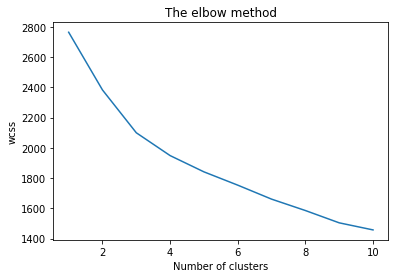

In [47]:
#Optimal K
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [48]:
#Accuracy_Score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_train)
clusters = kmeans.predict(x_test)
accuracy_score(y_test, pd.DataFrame(clusters))

0.5047619047619047

# K-Means Clustering Without PCA

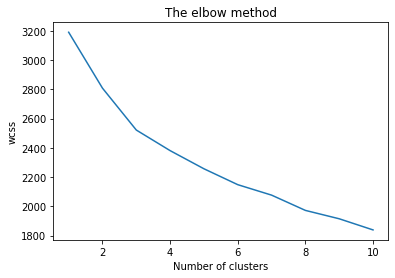

In [49]:
#Optimal K
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(x2_train)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [50]:
#Accuracy_Score
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(x2_train)
clusters2 = kmeans2.fit_predict(x2_test)
accuracy_score(y2_test, pd.DataFrame(clusters2))

0.5142857142857142

# DBSCAN With PCA

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
#optimize Param
for i in np.arange(0.1, 10, 0.1):
    for j in range(1,10):
        dbscan = DBSCAN(eps=i, min_samples=j)
        clustersDB = dbscan.fit_predict(x)
        if len(np.unique(clustersDB)) == 3:
            y_DBTest = y[clustersDB!=-1]
            clustersDf = pd.DataFrame(clustersDB)
            y_DBPred = clustersDf[clustersDB!=-1]
            print("eps: "+str(round(i,1))+", min_samples "+str(j)+", Accuracy: ", accuracy_score(y_DBTest, y_DBPred))

eps: 0.9, min_samples 3, Accuracy:  0.16666666666666666
eps: 1.3, min_samples 7, Accuracy:  0.74
eps: 1.3, min_samples 8, Accuracy:  0.7346938775510204
eps: 1.3, min_samples 9, Accuracy:  0.75
eps: 1.4, min_samples 4, Accuracy:  0.8252427184466019
eps: 1.4, min_samples 5, Accuracy:  0.8187134502923976
eps: 1.5, min_samples 5, Accuracy:  0.8220338983050848
eps: 1.6, min_samples 5, Accuracy:  0.8321167883211679
eps: 1.8, min_samples 3, Accuracy:  0.8376811594202899
eps: 1.9, min_samples 3, Accuracy:  0.8379888268156425
eps: 2.0, min_samples 3, Accuracy:  0.8419618528610354
eps: 2.1, min_samples 3, Accuracy:  0.843915343915344
eps: 2.2, min_samples 4, Accuracy:  0.8407310704960835
eps: 2.6, min_samples 2, Accuracy:  0.849624060150376
eps: 2.7, min_samples 2, Accuracy:  0.8486352357320099
eps: 2.9, min_samples 2, Accuracy:  0.8504901960784313
eps: 3.0, min_samples 2, Accuracy:  0.8504901960784313
eps: 3.1, min_samples 2, Accuracy:  0.8504901960784313
eps: 3.2, min_samples 2, Accuracy:  0.8

# DBSCAN Without PCA 

In [54]:
#optimize Param
for z in np.arange(0.1, 10, 0.1):
    for v in range(1,10):
        dbscan2 = DBSCAN(eps=z, min_samples=v)
        clusters2 = dbscan2.fit_predict(x2)
        if len(np.unique(clusters2)) == 3:
            y_DBTest2 = y2[clusters2!=-1]
            clustersDf2 = pd.DataFrame(clusters2)
            y_DBPred2 = clustersDf2[clusters2!=-1]
            print("eps: "+str(round(z,1))+", min_samples "+str(v)+", Accuracy: ", accuracy_score(y_DBTest2, y_DBPred2))

eps: 1.0, min_samples 2, Accuracy:  0.8
eps: 1.2, min_samples 3, Accuracy:  0.3333333333333333
eps: 1.4, min_samples 4, Accuracy:  0.4444444444444444
eps: 1.7, min_samples 5, Accuracy:  0.7744360902255639
eps: 1.8, min_samples 5, Accuracy:  0.8148148148148148
eps: 1.8, min_samples 8, Accuracy:  0.8116883116883117
eps: 1.8, min_samples 9, Accuracy:  0.7928571428571428
eps: 1.9, min_samples 4, Accuracy:  0.8178438661710037
eps: 1.9, min_samples 5, Accuracy:  0.8282442748091603
eps: 2.0, min_samples 3, Accuracy:  0.8378378378378378
eps: 2.0, min_samples 4, Accuracy:  0.821917808219178
eps: 2.0, min_samples 5, Accuracy:  0.8194444444444444
eps: 2.0, min_samples 6, Accuracy:  0.8162544169611308
eps: 2.1, min_samples 3, Accuracy:  0.8404907975460123
eps: 2.3, min_samples 3, Accuracy:  0.847457627118644
eps: 5.5, min_samples 1, Accuracy:  0.8547619047619047
eps: 5.6, min_samples 1, Accuracy:  0.8547619047619047
eps: 5.7, min_samples 1, Accuracy:  0.8547619047619047
eps: 5.8, min_samples 1, Ac

# Neural Network With PCA

In [55]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [56]:
x_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
3,0.593251,0.166147,0.259957,0.380827,-0.976943,-0.357808,-0.216468,0.476698
18,0.111189,-1.117124,0.289488,-0.362587,-0.479594,-0.123148,1.182519,-0.254438
393,0.100300,0.193425,0.115749,-1.099268,-1.251487,0.988319,-0.604602,0.057214
60,3.087905,0.737198,-0.268866,0.668411,-1.513256,0.244426,-0.637201,-0.140132
203,-1.038286,0.073289,-0.580968,0.983942,-1.021242,0.972781,0.532987,0.603915
...,...,...,...,...,...,...,...,...
71,1.143245,-1.083442,1.078203,-0.038547,2.078476,0.862651,0.491412,-0.716558
106,-0.514091,0.779938,0.512217,-1.482956,0.465426,1.205366,0.245000,-0.512258
270,-0.983941,-0.412297,0.423331,0.124836,0.118205,0.570047,0.405949,0.466393
348,0.369123,-1.533841,-1.270426,-1.002546,-0.298601,-0.219680,0.660890,0.642442


In [57]:
y_NNTrain = to_categorical(y_train)
y_NNTest = to_categorical(y_test)

In [58]:
model = Sequential()
model.add(Dense(1000, input_shape=(x_train.shape[1],), activation="sigmoid"))
model.add(Dense(1000, activation="sigmoid"))
model.add(Dense(1000, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_NNTrain, batch_size=64, epochs=500, verbose=1)

Epoch 1/500
315/315 [==============================] - 1s 2ms/step - loss: 0.9853 - accuracy: 0.8730
Epoch 2/500
315/315 [==============================] - 0s 716us/step - loss: 0.5833 - accuracy: 0.7079
Epoch 3/500
315/315 [==============================] - 0s 885us/step - loss: 0.4225 - accuracy: 0.8730
Epoch 4/500
315/315 [==============================] - 0s 723us/step - loss: 0.4234 - accuracy: 0.8730
Epoch 5/500
315/315 [==============================] - 0s 694us/step - loss: 0.3998 - accuracy: 0.8730
Epoch 6/500
315/315 [==============================] - 0s 719us/step - loss: 0.3889 - accuracy: 0.8730
Epoch 7/500
315/315 [==============================] - 0s 706us/step - loss: 0.3846 - accuracy: 0.8730
Epoch 8/500
315/315 [==============================] - 0s 714us/step - loss: 0.3810 - accuracy: 0.8730
Epoch 9/500
315/315 [==============================] - 0s 906us/step - loss: 0.3806 - accuracy: 0.8730
Epoch 10/500
315/315 [==============================] - 0s 871us/step - los

315/315 [==============================] - 0s 729us/step - loss: 0.2312 - accuracy: 0.8889
Epoch 158/500
315/315 [==============================] - 0s 797us/step - loss: 0.2311 - accuracy: 0.8952
Epoch 159/500
315/315 [==============================] - 0s 789us/step - loss: 0.2313 - accuracy: 0.8857
Epoch 160/500
315/315 [==============================] - 0s 776us/step - loss: 0.2314 - accuracy: 0.8825
Epoch 161/500
315/315 [==============================] - 0s 821us/step - loss: 0.2388 - accuracy: 0.8730
Epoch 162/500
315/315 [==============================] - 0s 740us/step - loss: 0.2304 - accuracy: 0.8825
Epoch 163/500
315/315 [==============================] - 0s 727us/step - loss: 0.2337 - accuracy: 0.8762
Epoch 164/500
315/315 [==============================] - 0s 805us/step - loss: 0.2313 - accuracy: 0.8952
Epoch 165/500
315/315 [==============================] - 0s 924us/step - loss: 0.2312 - accuracy: 0.8762
Epoch 166/500
315/315 [==============================] - 0s 820us/ste

315/315 [==============================] - 0s 843us/step - loss: 0.2048 - accuracy: 0.9175
Epoch 314/500
315/315 [==============================] - 0s 852us/step - loss: 0.1948 - accuracy: 0.8984
Epoch 315/500
315/315 [==============================] - 0s 840us/step - loss: 0.1943 - accuracy: 0.8984
Epoch 316/500
315/315 [==============================] - 0s 852us/step - loss: 0.1954 - accuracy: 0.9175
Epoch 317/500
315/315 [==============================] - 0s 880us/step - loss: 0.1914 - accuracy: 0.9143
Epoch 318/500
315/315 [==============================] - 0s 885us/step - loss: 0.1954 - accuracy: 0.9048
Epoch 319/500
315/315 [==============================] - 0s 878us/step - loss: 0.1929 - accuracy: 0.9206
Epoch 320/500
315/315 [==============================] - 0s 778us/step - loss: 0.2062 - accuracy: 0.8984
Epoch 321/500
315/315 [==============================] - 0s 791us/step - loss: 0.2007 - accuracy: 0.9175
Epoch 322/500
315/315 [==============================] - 0s 799us/ste

315/315 [==============================] - 0s 810us/step - loss: 0.1467 - accuracy: 0.9365
Epoch 470/500
315/315 [==============================] - 0s 808us/step - loss: 0.1467 - accuracy: 0.9397
Epoch 471/500
315/315 [==============================] - 0s 764us/step - loss: 0.1445 - accuracy: 0.9397
Epoch 472/500
315/315 [==============================] - 0s 769us/step - loss: 0.1508 - accuracy: 0.9333
Epoch 473/500
315/315 [==============================] - 0s 773us/step - loss: 0.1407 - accuracy: 0.9397
Epoch 474/500
315/315 [==============================] - 0s 722us/step - loss: 0.1487 - accuracy: 0.9460
Epoch 475/500
315/315 [==============================] - 0s 737us/step - loss: 0.1436 - accuracy: 0.9429
Epoch 476/500
315/315 [==============================] - 0s 785us/step - loss: 0.1421 - accuracy: 0.9429
Epoch 477/500
315/315 [==============================] - 0s 801us/step - loss: 0.1398 - accuracy: 0.9397
Epoch 478/500
315/315 [==============================] - 0s 763us/ste

In [60]:
y_NNPred = model.predict(x_test)

In [61]:
for i in np.arange(len(y_pred)):
    print("Actual: ", y_NNTest[i], ", Predicted: ", y_NNPred[i])

Actual:  [0. 1.] , Predicted:  [0.284737   0.71526307]
Actual:  [1. 0.] , Predicted:  [9.9999988e-01 1.2940272e-07]
Actual:  [1. 0.] , Predicted:  [9.9999905e-01 9.9360022e-07]
Actual:  [1. 0.] , Predicted:  [9.997695e-01 2.305441e-04]
Actual:  [1. 0.] , Predicted:  [0.96890837 0.03109161]
Actual:  [1. 0.] , Predicted:  [0.99671507 0.0032849 ]
Actual:  [1. 0.] , Predicted:  [1.0000000e+00 2.9102455e-11]
Actual:  [1. 0.] , Predicted:  [0.9971923  0.00280768]
Actual:  [1. 0.] , Predicted:  [0.43184638 0.5681537 ]
Actual:  [1. 0.] , Predicted:  [0.9652243  0.03477564]
Actual:  [1. 0.] , Predicted:  [9.9973172e-01 2.6825283e-04]
Actual:  [1. 0.] , Predicted:  [1.0000000e+00 2.5730167e-09]
Actual:  [0. 1.] , Predicted:  [0.23437157 0.76562846]
Actual:  [1. 0.] , Predicted:  [9.9999988e-01 1.3544228e-07]
Actual:  [1. 0.] , Predicted:  [0.986524   0.01347596]
Actual:  [1. 0.] , Predicted:  [9.9996352e-01 3.6481808e-05]
Actual:  [1. 0.] , Predicted:  [9.9999857e-01 1.4469592e-06]
Actual:  [1. 

In [62]:
def prediction():
    list = []
    for i in np.arange(len(y_NNPred)):
        if y_NNPred[i,0] > y_NNPred[i,1]:
            list.append(0.0)
        else:
            list.append(1.0)
    return list

In [63]:
y_pred = prediction()
confusion_matrix (y_test, y_pred, labels =[1, 0])

array([[11,  8],
       [ 7, 79]], dtype=int64)

In [64]:
#Using reLU
model = Sequential()
model.add(Dense(1000, input_shape=(x_train.shape[1],), activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse", metrics=None)
model.fit(x_train, y_train, batch_size=64, epochs=500, verbose=1)

Epoch 1/500
315/315 [==============================] - 0s 1ms/step - loss: 0.2479
Epoch 2/500
315/315 [==============================] - 0s 724us/step - loss: 0.1038
Epoch 3/500
315/315 [==============================] - 0s 730us/step - loss: 0.0881
Epoch 4/500
315/315 [==============================] - 0s 713us/step - loss: 0.0787
Epoch 5/500
315/315 [==============================] - 0s 718us/step - loss: 0.0687
Epoch 6/500
315/315 [==============================] - 0s 699us/step - loss: 0.0655
Epoch 7/500
315/315 [==============================] - 0s 676us/step - loss: 0.0560
Epoch 8/500
315/315 [==============================] - 0s 809us/step - loss: 0.0515
Epoch 9/500
315/315 [==============================] - 0s 739us/step - loss: 0.0476
Epoch 10/500
315/315 [==============================] - 0s 781us/step - loss: 0.0431
Epoch 11/500
315/315 [==============================] - 0s 715us/step - loss: 0.0386
Epoch 12/500
315/315 [==============================] - 0s 724us/step - loss

Epoch 95/500
315/315 [==============================] - 0s 764us/step - loss: 0.0012
Epoch 96/500
315/315 [==============================] - 0s 760us/step - loss: 8.2750e-04 0s - loss: 4.4086e-
Epoch 97/500
315/315 [==============================] - 0s 768us/step - loss: 7.4603e-04
Epoch 98/500
315/315 [==============================] - 0s 749us/step - loss: 6.1798e-04
Epoch 99/500
315/315 [==============================] - 0s 775us/step - loss: 7.6400e-04
Epoch 100/500
315/315 [==============================] - 0s 729us/step - loss: 3.1709e-04
Epoch 101/500
315/315 [==============================] - 0s 749us/step - loss: 4.2658e-04
Epoch 102/500
315/315 [==============================] - 0s 746us/step - loss: 2.6710e-04
Epoch 103/500
315/315 [==============================] - 0s 744us/step - loss: 1.8182e-04
Epoch 104/500
315/315 [==============================] - 0s 760us/step - loss: 9.8752e-05
Epoch 105/500
315/315 [==============================] - 0s 715us/step - loss: 8.2871e-05

315/315 [==============================] - 0s 802us/step - loss: 2.9728e-04
Epoch 278/500
315/315 [==============================] - 0s 826us/step - loss: 1.8046e-04
Epoch 279/500
315/315 [==============================] - 0s 808us/step - loss: 1.9889e-04
Epoch 280/500
315/315 [==============================] - 0s 915us/step - loss: 1.2229e-04
Epoch 281/500
315/315 [==============================] - 0s 835us/step - loss: 1.7449e-04
Epoch 282/500
315/315 [==============================] - 0s 766us/step - loss: 1.9735e-04
Epoch 283/500
315/315 [==============================] - 0s 772us/step - loss: 1.4996e-04
Epoch 284/500
315/315 [==============================] - 0s 762us/step - loss: 1.4636e-04
Epoch 285/500
315/315 [==============================] - 0s 736us/step - loss: 1.3395e-04
Epoch 286/500
315/315 [==============================] - 0s 765us/step - loss: 9.9607e-05
Epoch 287/500
315/315 [==============================] - 0s 803us/step - loss: 6.6454e-05
Epoch 288/500
315/315 [=

315/315 [==============================] - 0s 730us/step - loss: 4.0422e-05
Epoch 460/500
315/315 [==============================] - 0s 775us/step - loss: 3.4013e-05
Epoch 461/500
315/315 [==============================] - 0s 725us/step - loss: 4.6209e-05
Epoch 462/500
315/315 [==============================] - 0s 727us/step - loss: 2.9968e-05
Epoch 463/500
315/315 [==============================] - 0s 697us/step - loss: 3.0575e-05
Epoch 464/500
315/315 [==============================] - 0s 763us/step - loss: 5.6172e-05
Epoch 465/500
315/315 [==============================] - 0s 748us/step - loss: 4.6044e-05
Epoch 466/500
315/315 [==============================] - 0s 730us/step - loss: 5.9984e-05
Epoch 467/500
315/315 [==============================] - 0s 850us/step - loss: 1.0946e-04
Epoch 468/500
315/315 [==============================] - 0s 787us/step - loss: 1.2320e-04
Epoch 469/500
315/315 [==============================] - 0s 764us/step - loss: 1.3375e-04
Epoch 470/500
315/315 [=

In [65]:
y_pred = prediction()
confusion_matrix (y_test, y_pred, labels =[1, 0])

array([[11,  8],
       [ 7, 79]], dtype=int64)